In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import tensorflow as tf
import numpy as np
import os

tf.config.list_physical_devices('GPU') 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
DATAPATH = os.path.abspath('../../data/')

1 Physical GPUs, 1 Logical GPUs


In [4]:
tokenizer = Tokenizer()

data = open(os.path.join(DATAPATH, 'sonnets.txt')).read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 11s 14ms/step - loss: 7.3219 - accuracy: 0.0193
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4520 - accuracy: 0.0238
Epoch 3/100
484/484 [==============================] - 7s 15ms/step - loss: 6.3815 - accuracy: 0.0240
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2523 - accuracy: 0.0280
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1447 - accuracy: 0.0369
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0759 - accuracy: 0.0396
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0037 - accuracy: 0.0413
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.9277 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8269 - accuracy: 0.0504
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 5.71

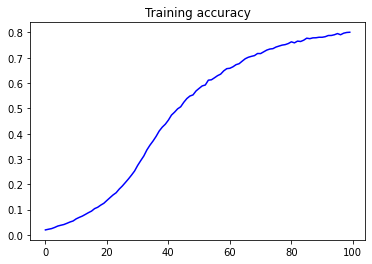

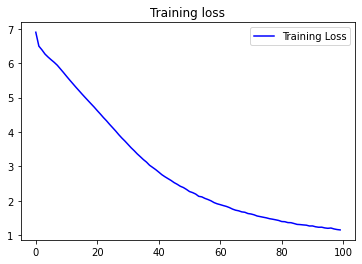

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "I had a wonderful dream, an incredible dream with you"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I had a wonderful dream, an incredible dream with you than white still say so so short more bad confounds she still his part and pride face new bright say bright say bright say bright ' alone here mute here young more strong hate hate smell up hate speaking tongue 'tis tongue 'tis face will bright change ' forbid her strong near feast hate control wrong ' pace taken ' thee will resort none remain grow mad so borrow'd tongue up words bearing thee tongue love's friend have have hate more strong near pride pride heart so face will lie her new to me so near slain seen too date
